#  Detection of network attacks using supervised machine learning

In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

### 1.Load data

In [2]:
df_1 = pd.read_csv("UNSW_NB15_training-set.csv")
df_2 = pd.read_csv("UNSW_NB15_testing-set.csv")


In [3]:
df = pd.concat([df_1, df_2], axis=0)

df.reset_index(drop=True, inplace=True)
df

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
257669,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
257670,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
257671,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0


### 2. Missing values

In [4]:
df.isna().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

We can confirm that there are no missing values in this dataset.


### 3. Descriptive statistics

In [5]:
df.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,257673.000000,257673.000000,257673.000000,257673.000000,2.576730e+05,2.576730e+05,2.576730e+05,257673.000000,257673.000000,2.576730e+05,...,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000
mean,72811.823858,1.246715,19.777144,18.514703,8.572952e+03,1.438729e+04,9.125391e+04,180.000931,84.754957,7.060869e+07,...,5.238271,4.032677,8.322964,0.012819,0.012850,0.132005,6.800045,9.121049,0.014274,0.639077
std,48929.917641,5.974305,135.947152,111.985965,1.737739e+05,1.461993e+05,1.603446e+05,102.488268,112.762131,1.857313e+08,...,8.160822,5.831515,11.120754,0.116091,0.116421,0.681854,8.396266,10.874752,0.118618,0.480269
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,32210.000000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.078928e+01,62.000000,0.000000,1.231800e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,64419.000000,0.004285,4.000000,2.000000,5.280000e+02,1.780000e+02,2.955665e+03,254.000000,29.000000,7.439423e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,110923.000000,0.685777,12.000000,10.000000,1.362000e+03,1.064000e+03,1.250000e+05,254.000000,252.000000,8.000000e+07,...,4.000000,3.000000,8.000000,0.000000,0.000000,0.000000,8.000000,11.000000,0.000000,1.000000
max,175341.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,...,59.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


### 4. Data scaling

### 4.1 Standardization

Standardization is a scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero, and the resultant distribution has a unit standard deviation. The standard deviation has a value of one.

It is calculated using the follwing formula:

$X_{\text{std}} = \frac{{X - \mu}}{{\sigma}}$

Where:
- $X$ is the original value of the feature.
- $X_{\text{std}}$ is the standardized value of the feature.
- $\mu$ is the mean of the feature in the dataset.
- $\sigma$ is the standard deviation of the feature in the dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  si

We will standardize every numerical feature excepts target and id.

In [7]:
standardized_data = df.copy()
scaler = StandardScaler()

columns_for_standardization = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

for col in ['label','id']:
    if col in columns_for_standardization:
        columns_for_standardization.remove(col)

standardized_data[columns_for_standardization] = scaler.fit_transform(standardized_data[columns_for_standardization])

df = standardized_data
df

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,-0.188346,tcp,-,FIN,-0.101342,-0.129612,-0.047849,-0.097232,-0.568650,...,-0.520051,-0.658496,-0.110419,-0.110372,-0.193597,-0.690790,-0.746782,-0.120335,Normal,0
1,2,-0.099897,tcp,-,FIN,-0.042496,0.173998,-0.045110,0.188966,-0.568623,...,-0.520051,-0.568574,-0.110419,-0.110372,-0.193597,-0.690790,-0.287000,-0.120335,Normal,0
2,3,0.063006,tcp,-,FIN,-0.086630,-0.022456,-0.047239,-0.008217,-0.569024,...,-0.520051,-0.478652,-0.110419,-0.110372,-0.193597,-0.571689,-0.287000,-0.120335,Normal,0
3,4,0.072800,tcp,ftp,FIN,-0.057207,-0.058174,-0.045720,-0.093142,-0.569027,...,-0.520051,-0.478652,8.503550,8.479151,-0.193597,-0.571689,-0.746782,-0.120335,Normal,0
4,5,-0.133449,tcp,-,FIN,-0.071919,-0.111753,-0.046261,-0.096576,-0.568904,...,-0.520051,2.848467,-0.110419,-0.110372,-0.193597,-0.571689,2.747558,-0.120335,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,82328,-0.208679,udp,-,INT,-0.130765,-0.165331,-0.048736,-0.098409,0.678204,...,-0.520051,-0.568574,-0.110419,-0.110372,-0.193597,-0.571689,-0.746782,-0.120335,Normal,0
257669,82329,-0.023537,tcp,-,FIN,0.001639,-0.093893,0.054606,-0.095988,-0.568960,...,-0.520051,-0.658496,-0.110419,-0.110372,-0.193597,-0.452588,-0.654825,-0.120335,Normal,0
257670,82330,-0.208680,arp,-,INT,-0.138121,-0.165331,-0.049069,-0.098409,-0.569112,...,-0.520051,-0.658496,-0.110419,-0.110372,-0.193597,-0.690790,-0.746782,8.310109,Normal,0
257671,82331,-0.208680,arp,-,INT,-0.138121,-0.165331,-0.049069,-0.098409,-0.569112,...,-0.520051,-0.658496,-0.110419,-0.110372,-0.193597,-0.690790,-0.746782,8.310109,Normal,0


### 5. Encoding categorical features

Data Encoding is an important pre-processing step in Machine Learning. It refers to the process of converting categorical or textual data into numerical format, so that it can be used as input for algorithms to process. The reason for encoding is that most machine learning algorithms work with numbers and not with text or categorical variables.

In [8]:
columns_to_encode = df.select_dtypes(include="object")
columns_to_encode=columns_to_encode.drop("attack_cat",axis=1)
columns_to_encode

,proto,service,state
0,tcp,-,FIN
1,tcp,-,FIN
2,tcp,-,FIN
3,tcp,ftp,FIN
4,tcp,-,FIN
...,...,...,...
257668,udp,-,INT
257669,tcp,-,FIN
257670,arp,-,INT
257671,arp,-,INT


With the help of LabelEncoder, we will encode all features of type object.


In [9]:
label_encoders = {}
for col in columns_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [10]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  int64  
 3   service            257673 non-null  int64  
 4   state              257673 non-null  int64  
 5   spkts              257673 non-null  float64
 6   dpkts              257673 non-null  float64
 7   sbytes             257673 non-null  float64
 8   dbytes             257673 non-null  float64
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  float64
 11  dttl               257673 non-null  float64
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  float64
 15  dloss              257673 non-null  float64
 16  si

Now, we will multiply data to X and y

In [11]:
X = X = df.drop(['attack_cat','label'], axis=1)
X

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,1,-0.188346,113,0,4,-0.101342,-0.129612,-0.047849,-0.097232,-0.568650,...,-0.617890,-0.519345,-0.520051,-0.658496,-0.110419,-0.110372,-0.193597,-0.690790,-0.746782,-0.120335
1,2,-0.099897,113,0,4,-0.042496,0.173998,-0.045110,0.188966,-0.568623,...,-0.617890,-0.519345,-0.520051,-0.568574,-0.110419,-0.110372,-0.193597,-0.690790,-0.287000,-0.120335
2,3,0.063006,113,0,4,-0.086630,-0.022456,-0.047239,-0.008217,-0.569024,...,-0.495547,-0.519345,-0.520051,-0.478652,-0.110419,-0.110372,-0.193597,-0.571689,-0.287000,-0.120335
3,4,0.072800,113,3,4,-0.057207,-0.058174,-0.045720,-0.093142,-0.569027,...,-0.495547,-0.519345,-0.520051,-0.478652,8.503550,8.479151,-0.193597,-0.571689,-0.746782,-0.120335
4,5,-0.133449,113,0,4,-0.071919,-0.111753,-0.046261,-0.096576,-0.568904,...,-0.495547,-0.396808,-0.520051,2.848467,-0.110419,-0.110372,-0.193597,-0.571689,2.747558,-0.120335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,82328,-0.208679,119,0,5,-0.130765,-0.165331,-0.048736,-0.098409,0.678204,...,-0.495547,-0.519345,-0.520051,-0.568574,-0.110419,-0.110372,-0.193597,-0.571689,-0.746782,-0.120335
257669,82329,-0.023537,113,0,4,0.001639,-0.093893,0.054606,-0.095988,-0.568960,...,-0.495547,-0.519345,-0.520051,-0.658496,-0.110419,-0.110372,-0.193597,-0.452588,-0.654825,-0.120335
257670,82330,-0.208680,6,0,5,-0.138121,-0.165331,-0.049069,-0.098409,-0.569112,...,-0.617890,-0.519345,-0.520051,-0.658496,-0.110419,-0.110372,-0.193597,-0.690790,-0.746782,8.310109
257671,82331,-0.208680,6,0,5,-0.138121,-0.165331,-0.049069,-0.098409,-0.569112,...,-0.617890,-0.519345,-0.520051,-0.658496,-0.110419,-0.110372,-0.193597,-0.690790,-0.746782,8.310109


In [12]:
y = df['label']
y

0         0
1         0
2         0
3         0
4         0
         ..
257668    0
257669    0
257670    0
257671    0
257672    0
Name: label, Length: 257673, dtype: int64

### 6. Data visualization

We will now plot a bar chart showing the distribution of the target variable (label), where 0 represents normal traffic and 1 represents attacks. It clearly illustrates the class imbalance in the dataset, which can impact model performance and may require resampling techniques such as undersampling or oversampling.


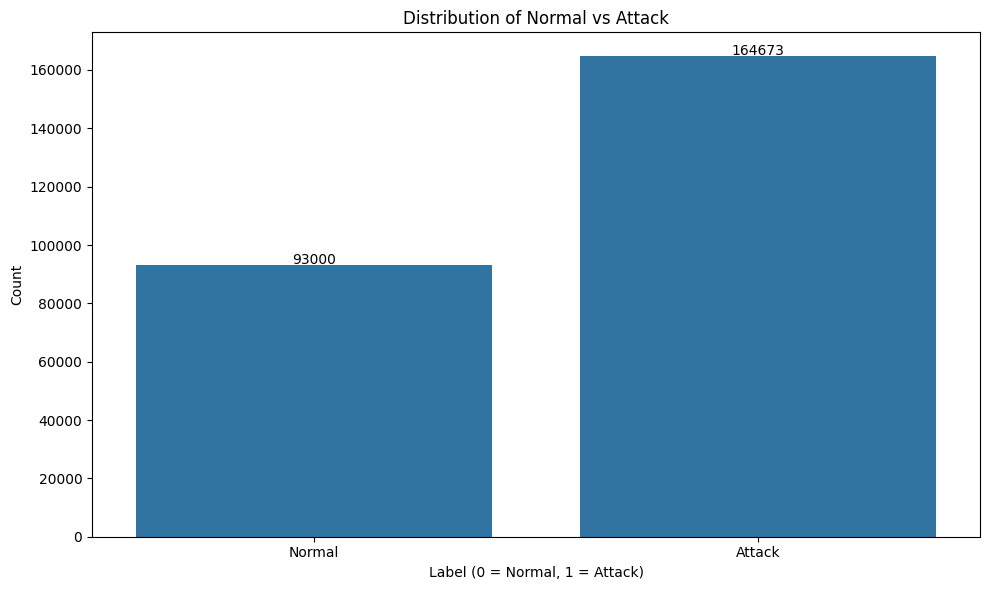

In [13]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='label', data=df)
plt.title('Distribution of Normal vs Attack')
plt.xlabel('Label (0 = Normal, 1 = Attack)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Normal', 'Attack'])

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 500, int(height), ha="center", fontsize=10)

plt.tight_layout()
plt.show()



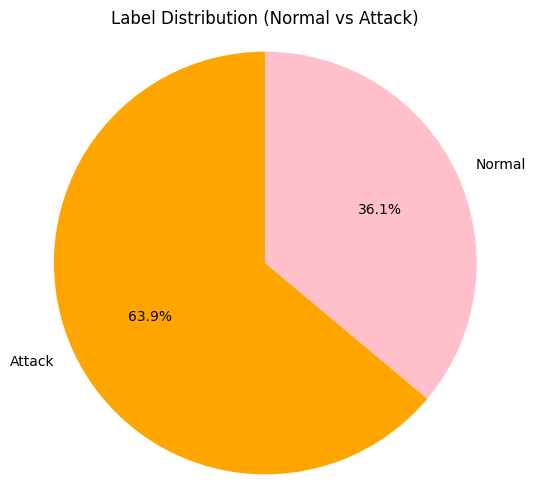

In [14]:
label_counts = df['label'].value_counts()
labels = ['Normal' if i == 0 else 'Attack' for i in label_counts.index]

plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['orange', 'pink'])
plt.title('Label Distribution (Normal vs Attack)')
plt.axis('equal')
plt.show()


 Now, let's plot the correlation matrix between the features. This matrix will show the relationships between numeric features, helping us identify strong correlations, potential multicollinearity, or redundant features that may need to be addressed during model training

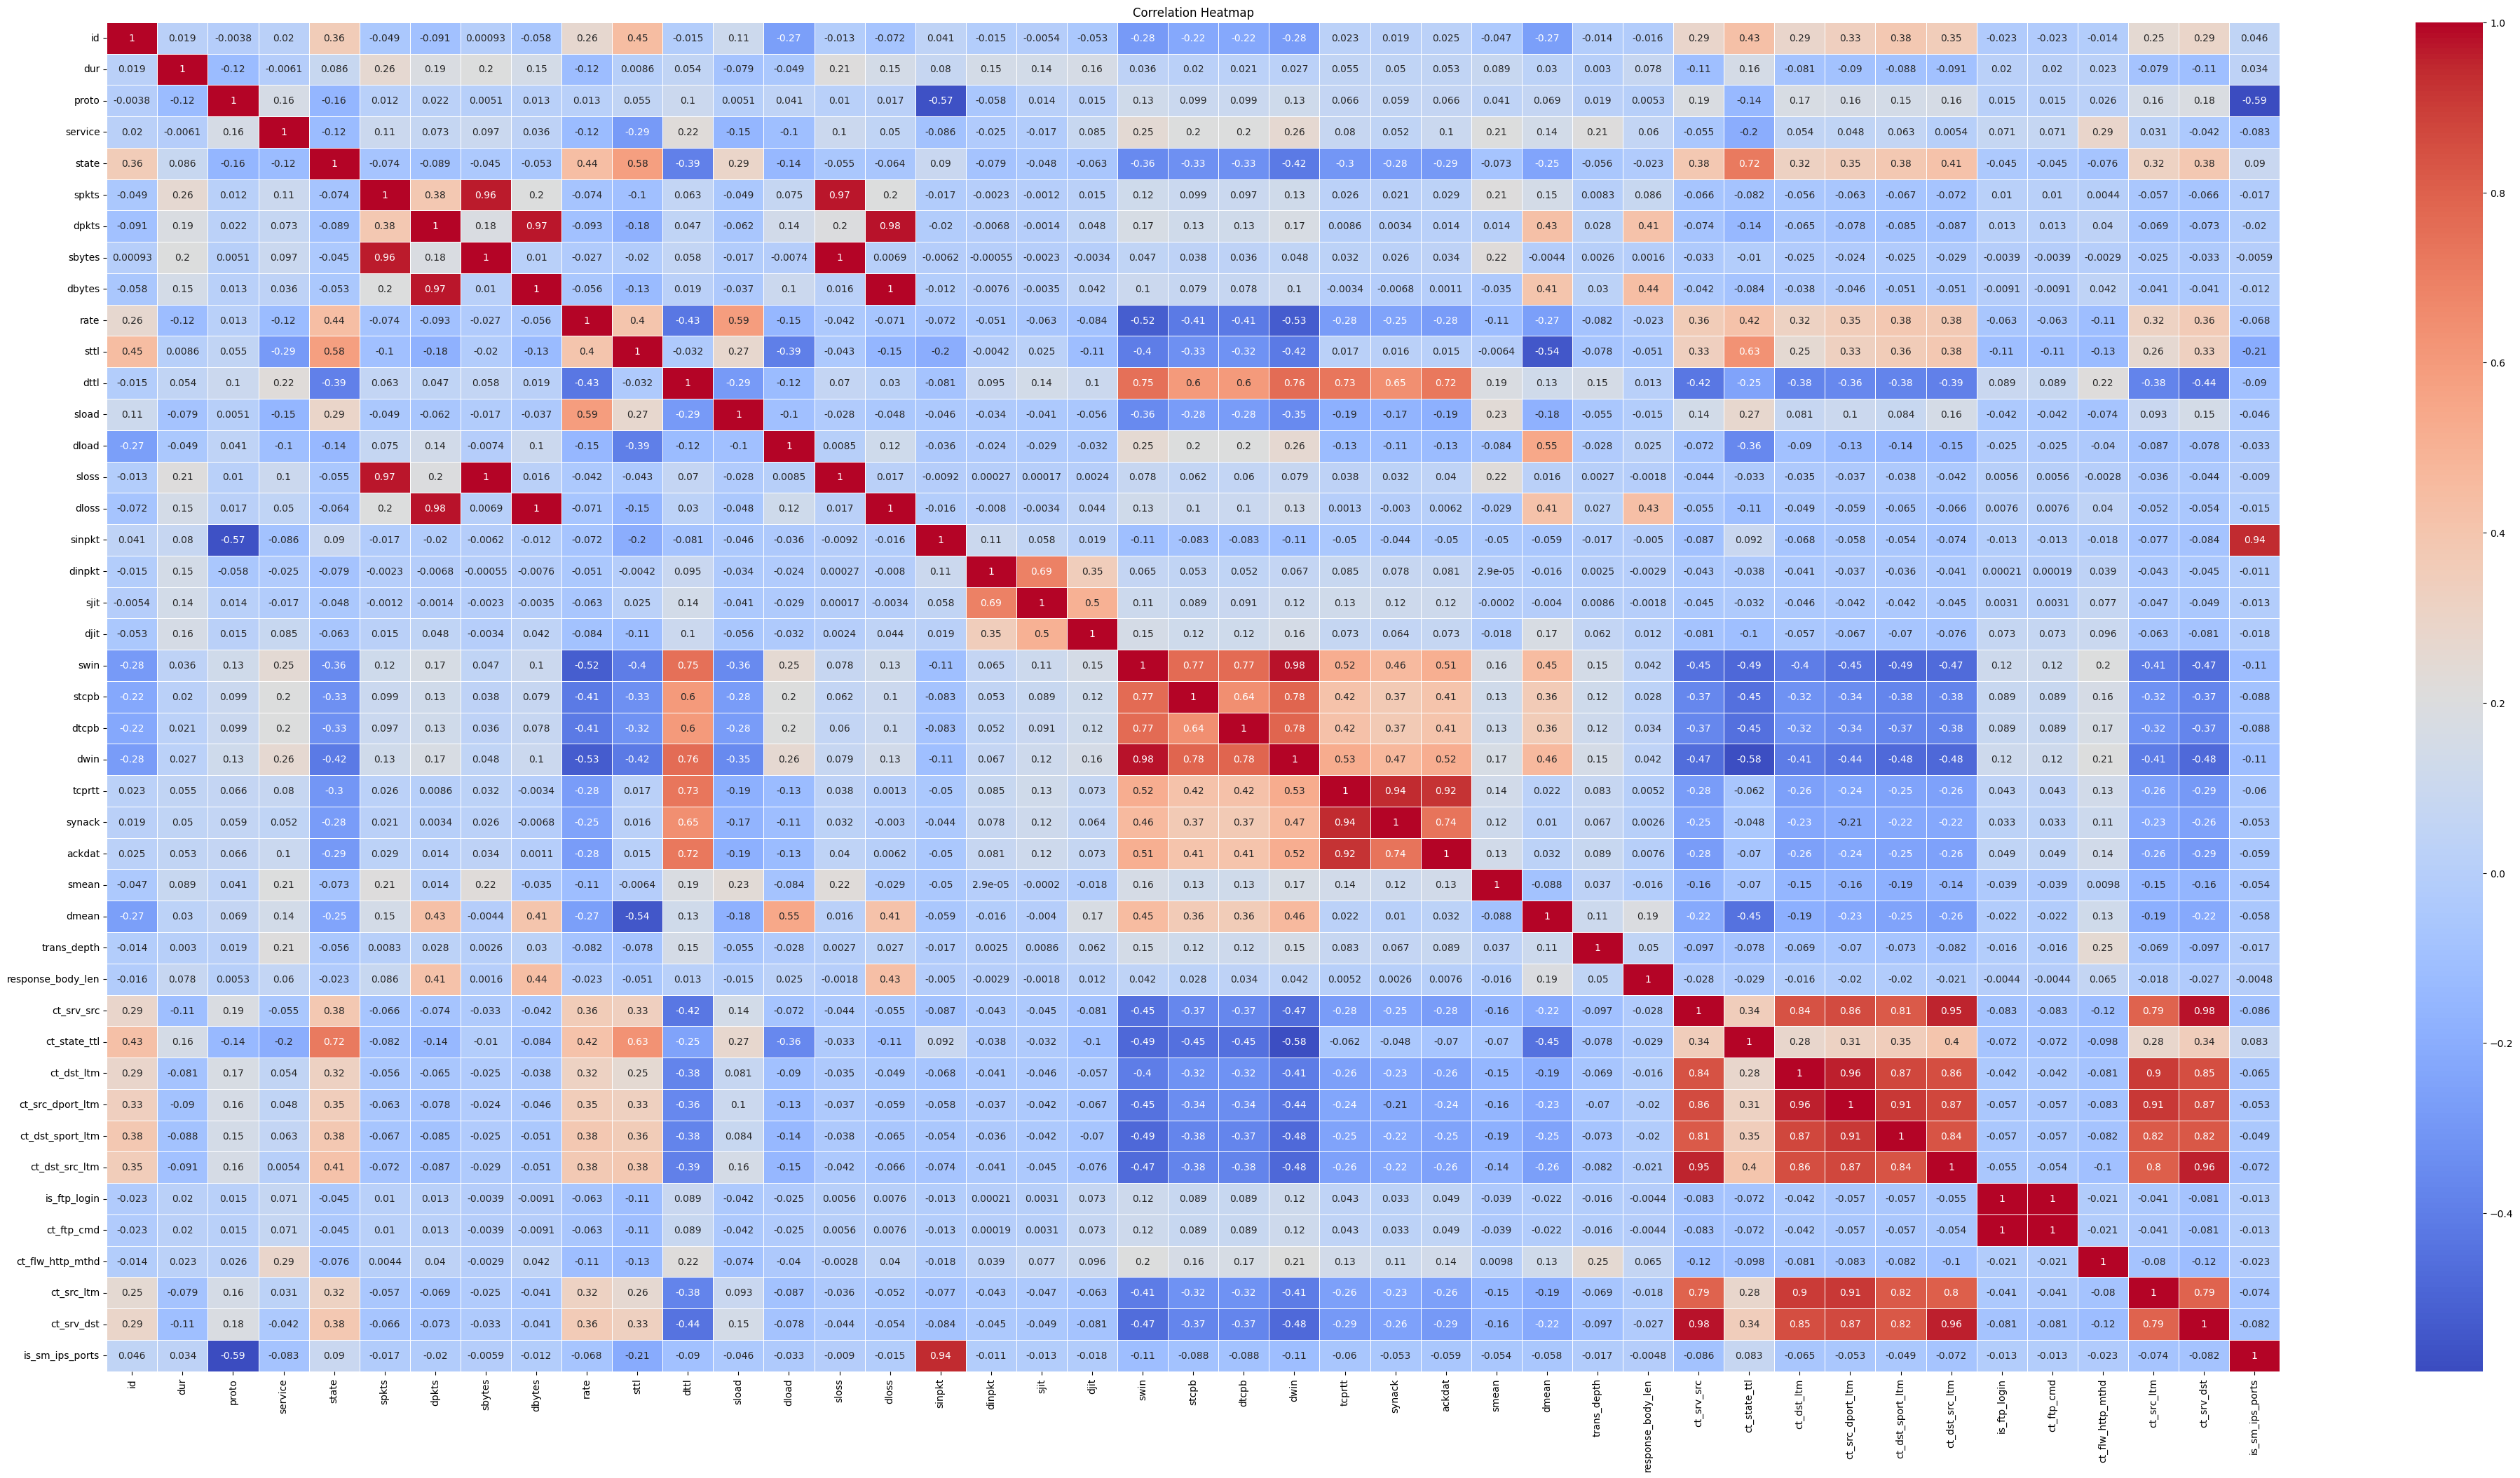

In [15]:
numeric_df = X.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()
plt.figure(figsize=(50, 25))  
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### 7. Train-test split

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix

X = X.drop('id',axis=1)

X_train = X[:175341] 
y_train = y[:175341] 

X_test = X[175341:257341]
y_test = y[175341:257341]

print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")
print(y_train.value_counts())


X_train: (175341, 42), X_test: (82000, 42)
y_train: (175341,), y_test: (82000,)
label
1    119341
0     56000
Name: count, dtype: int64


### 8. Undersampling

Since the dataset is quite imbalanced, we will apply a technique called undersampling in order to achieve balance.


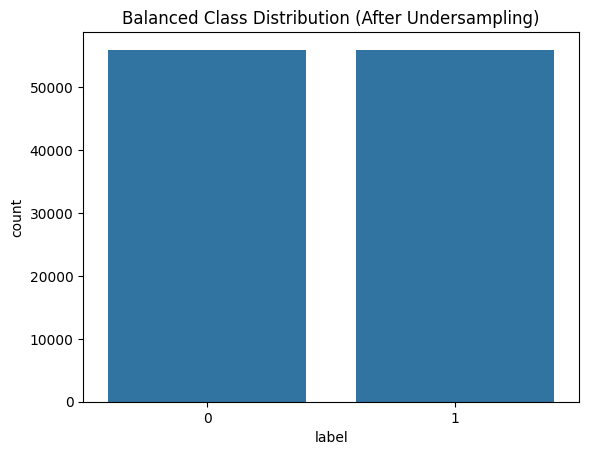

In [17]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=1)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

sns.countplot(x=y_train_resampled)
plt.title("Balanced Class Distribution (After Undersampling)")
plt.show()


In [18]:
print(y_train_resampled.value_counts())

label
0    56000
1    56000
Name: count, dtype: int64


### 9. Training models

In this section, we will train different models and see how they compare. We will look at a few performance metrics - accuracy being the main one, but also recall and precision, which aim to show how well the model distinguishes between the positive and negative class, in that we want to see how to reduce Type I errors (false positives) and type II errors (false negatives)

### 9.1 Decision tree

In [20]:
model = DecisionTreeClassifier(random_state=1, max_depth=10)

model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9209146341463414
[[32744  3924]
 [ 2561 42771]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91     36668
           1       0.92      0.94      0.93     45332

    accuracy                           0.92     82000
   macro avg       0.92      0.92      0.92     82000
weighted avg       0.92      0.92      0.92     82000



In [21]:
def plot_cm(y_true, y_pred, cmap="Blues", figsize=(4, 4)):
    """
    Plot confusion matrix heatmap.

    Parameters:
        y_true (array-like): True labels.
        y_pred (array-like): Predicted labels.
        cmap (str, optional): Colormap for the heatmap. Defaults to 'Blues'.
    """
    cm = confusion_matrix(y_true, y_pred)

    plot_confusion_matrix(
        conf_mat=cm,
        show_absolute=True,
        show_normed=True,
        colorbar=True,
        cmap=cmap,
        figsize=figsize,
    )
    plt.show()

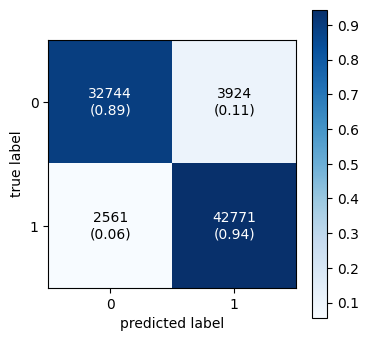

In [22]:
plot_cm(y_test,y_pred)

### 9.2 Random Forest

Accuracy: 0.9180487804878049
[[31561  5107]
 [ 1613 43719]]
              precision    recall  f1-score   support

           0       0.95      0.86      0.90     36668
           1       0.90      0.96      0.93     45332

    accuracy                           0.92     82000
   macro avg       0.92      0.91      0.92     82000
weighted avg       0.92      0.92      0.92     82000



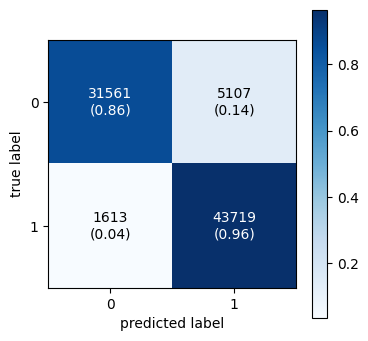

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,     
    max_depth=10,           
    random_state=1,
)

rf_model.fit(X_train_resampled, y_train_resampled)

y_pred_rf = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
plot_cm(y_test, y_pred_rf)


### 9.3 Logictic regression

Accuracy: 0.8501463414634146
[[30223  6445]
 [ 5843 39489]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83     36668
           1       0.86      0.87      0.87     45332

    accuracy                           0.85     82000
   macro avg       0.85      0.85      0.85     82000
weighted avg       0.85      0.85      0.85     82000



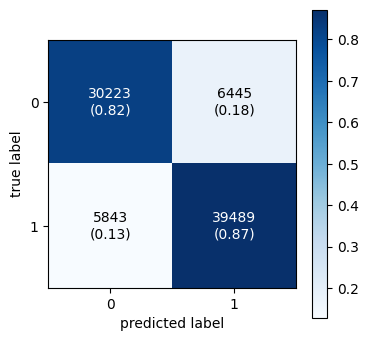

In [24]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='newton-cholesky')

lr.fit(X_train_resampled, y_train_resampled)

y_prob_lr = lr.predict_proba(X_test)

y_pred_lr = (y_prob_lr[:,1] >= 0.6).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
plot_cm(y_test, y_pred_lr)

### 10. Summary

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

metrics = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Decision Tree": [
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred)
    ],
    "Random Forest": [
        accuracy_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_rf)
    ],
    "Logistic Regression": [
        accuracy_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_lr)
    ]
}

comparison_df = pd.DataFrame(metrics)
comparison_df


,Metric,Decision Tree,Random Forest,Logistic Regression
0,Accuracy,0.920915,0.918049,0.850146
1,Precision,0.915965,0.895404,0.859690
2,Recall,0.943506,0.964418,0.871107
3,F1 Score,0.929532,0.928631,0.865361


The results of the models show us that Decision Tree demonstrates the highest accuracy across all 3 models. However, accuracy does not give us the full picture as it only demonstrates how many instances the model got right.

Our priority is correctly predicting attack instances, hence we should look at recall, because it's what shows us the amount of false negatives our model generates. When we compare recall, we actually see that Random Forest has higher recall, which means that it is better at detecting positive class instances, though it may generate a few more false positives too, sacrificing precision.

Logistic Regression performs the worst overall, so overall, with some additional tuning, one might deploy the RF classifier, and future work could lie in reducing the amount of false negatives/false positives. 